# Entropy parameters

In this example, the entropy parameters are calculated and used for distinction of solid and liquid. For a description of entropy parameters, see [here](http://pyscal.com/en/latest/methods/entropy_parameters/entropy_parameters.html). 

In [1]:
import pyscal.core as pc
import matplotlib.pyplot as plt
import numpy as np

We have two test configurations for Al at 900 K, one is fcc structured and the other one is in liquid state. We calculate the entropy parameters for each of these configurations. First we start by reading in the fcc configuration. For entropy parameters, the values of the integration limit $r_m$ is chosen as 1.4, based on the [original publication](https://aip.scitation.org/doi/10.1063/1.4998408). 

In [2]:
sys = pc.System()
sys.read_inputfile("../tests/conf.fcc.Al.dump")
sys.find_neighbors(method="cutoff", cutoff=0)

The values of $r_m$ is in units of lattice constant, so we need to calculate the lattice constant first. Since is a cubic box, we can do this by,

In [3]:
lat = (sys.box[0][1]-sys.box[0][0])/5

Now we calculate the entropy parameter and its averaged version. Averaging can be done in two methods, as a simple average over neighbors or using a switching function. We will use a simple averaging over the neighbors. The `local` keyword allows to use a local density instead of the global one. However, this only works if the neighbors were calculated using a cutoff method.

In [4]:
sys.calculate_entropy(1.4*lat, averaged=True, local=True)

The calculated values are stored for each atom. This can be accessed as follows,

In [5]:
atoms = sys.atoms
solid_entropy = [atom.entropy for atom in atoms]
solid_avg_entropy = [atom.avg_entropy for atom in atoms]

Now we can quickly repeat the calculation for the liquid structure.

In [6]:
sys = pc.System()
sys.read_inputfile("../tests/conf.lqd.Al.dump")
sys.find_neighbors(method="cutoff", cutoff=0)
lat = (sys.box[0][1]-sys.box[0][0])/5
sys.calculate_entropy(1.4*lat, local=True, averaged=True)
atoms = sys.atoms
liquid_entropy = [atom.entropy for atom in atoms]
liquid_avg_entropy = [atom.avg_entropy for atom in atoms]

Finally we can plot the results

Text(0.5, 0, '$s_s^i$')

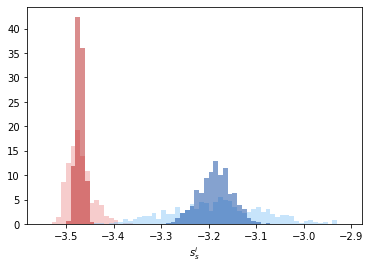

In [7]:
xmin = -3.55
xmax = -2.9
bins = np.arange(xmin, xmax, 0.01)
x = plt.hist(solid_entropy, bins=bins, density=True, alpha=0.5, color="#EF9A9A")
x = plt.hist(solid_avg_entropy, bins=bins, density=True, alpha=0.5, color="#B71C1C")
x = plt.hist(liquid_entropy, bins=bins, density=True, alpha=0.5, color="#90CAF9")
x = plt.hist(liquid_avg_entropy, bins=bins, density=True, alpha=0.5, color="#0D47A1")
plt.xlabel(r"$s_s^i$")

The distributions of $s_s^i$ given in light red and light blue are fairly distinct but show some overlap. The averaged entropy parameter, $\bar{s}_s^i$ show distinct peaks which can distinguish solid and liquid very well.

In [8]:
np.mean(solid_entropy), np.mean(solid_avg_entropy)

(-3.47074287018929, -3.47074287018929)